In [9]:
# 时间解析
from dateutil.parser import parse

# 数据可视化
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 数据处理
import numpy as np
import pandas as pd
plt.rcParams.update({
    "figure.figsize": (10, 7),
    "figure.dpi": 120,
})

# 1.读取数据

## 1.1 时间序列数据

In [27]:
df_a10 = pd.read_csv(
    # "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv", 
    "/Users/zfwang/machinelearning/datasets/a10/a10.csv",
    parse_dates=['date'],
    # index_col = "date",
)
df_a10.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


## 1.2 面板数据

In [15]:
df_market_arrivals = pd.read_csv(
    # "https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv"
    "/Users/zfwang/machinelearning/datasets/a10/MarketArrivals.csv"
)
df_market_arrivals = df_market_arrivals.loc[df_market_arrivals.market == "MUMBAI", :]
df_market_arrivals.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


# 2.时间序列可视化

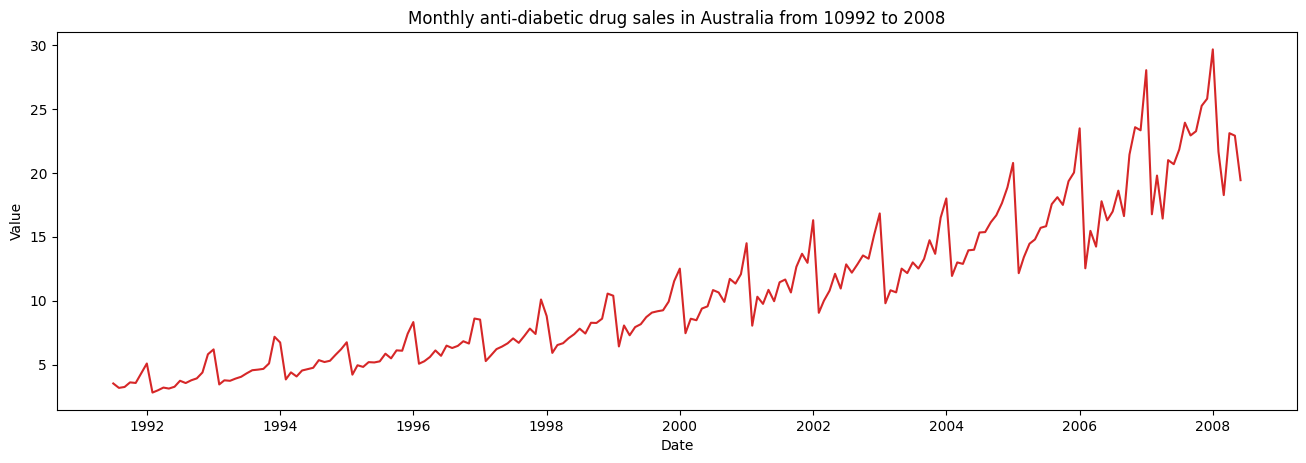

In [29]:
def plot_df(date, value, title = "", xlabel = "Date", ylabel = "Value", dpi = 100):
    plt.figure(figsize = (16, 5), dpi = dpi)
    plt.plot(date, value, color = "tab:red")
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()

plot_df(
    x = df_a10["date"].values, 
    y = df_a10["value"].values, 
    title = "Monthly anti-diabetic drug sales in Australia from 10992 to 2008"
)

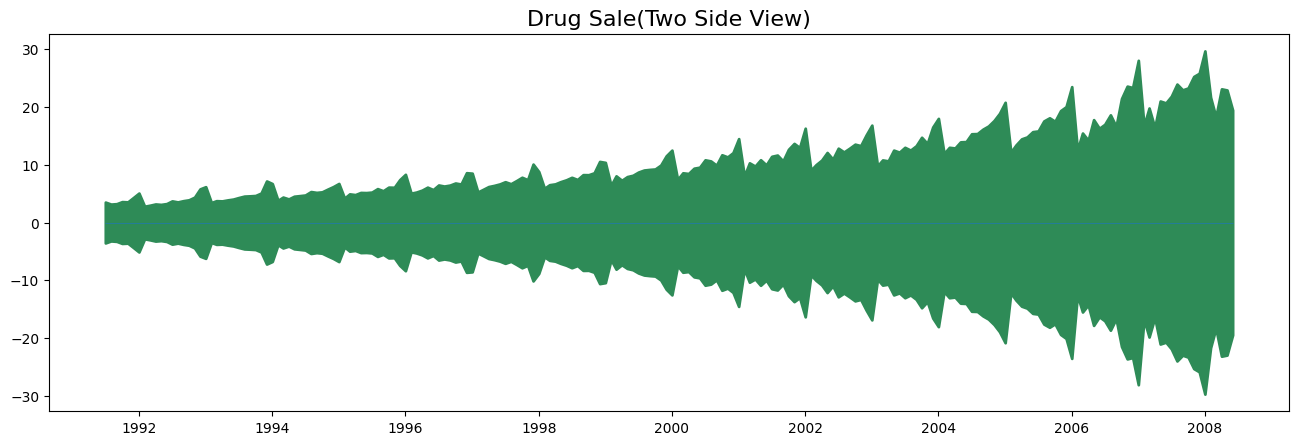

In [35]:
def plot_two_side_df(date, value, title = "", xlabel = "Date", ylabel = "Value", dpi = 100):
    fig, ax = plt.subplots(1, 1, figsize = (16, 5), dpi = dpi)
    plt.fill_between(x = date, y1 = value, y2 = -value, linewidth = 2, color = "seagreen")
    plt.ylim()
    plt.title(title, fontsize = 16)
    plt.hlines(y = 0, xmin = np.min(x), xmax = np.max(x), linewidth = 0.5)
    plt.show()
    
plot_two_side_df(
    x = df_a10["date"].values, 
    y = df_a10["value"].values,
    title = "Drug Sale(Two Side View)"
)

Text(0.5, 1.0, 'Seasonal Plot of Drug Sales Time Series')

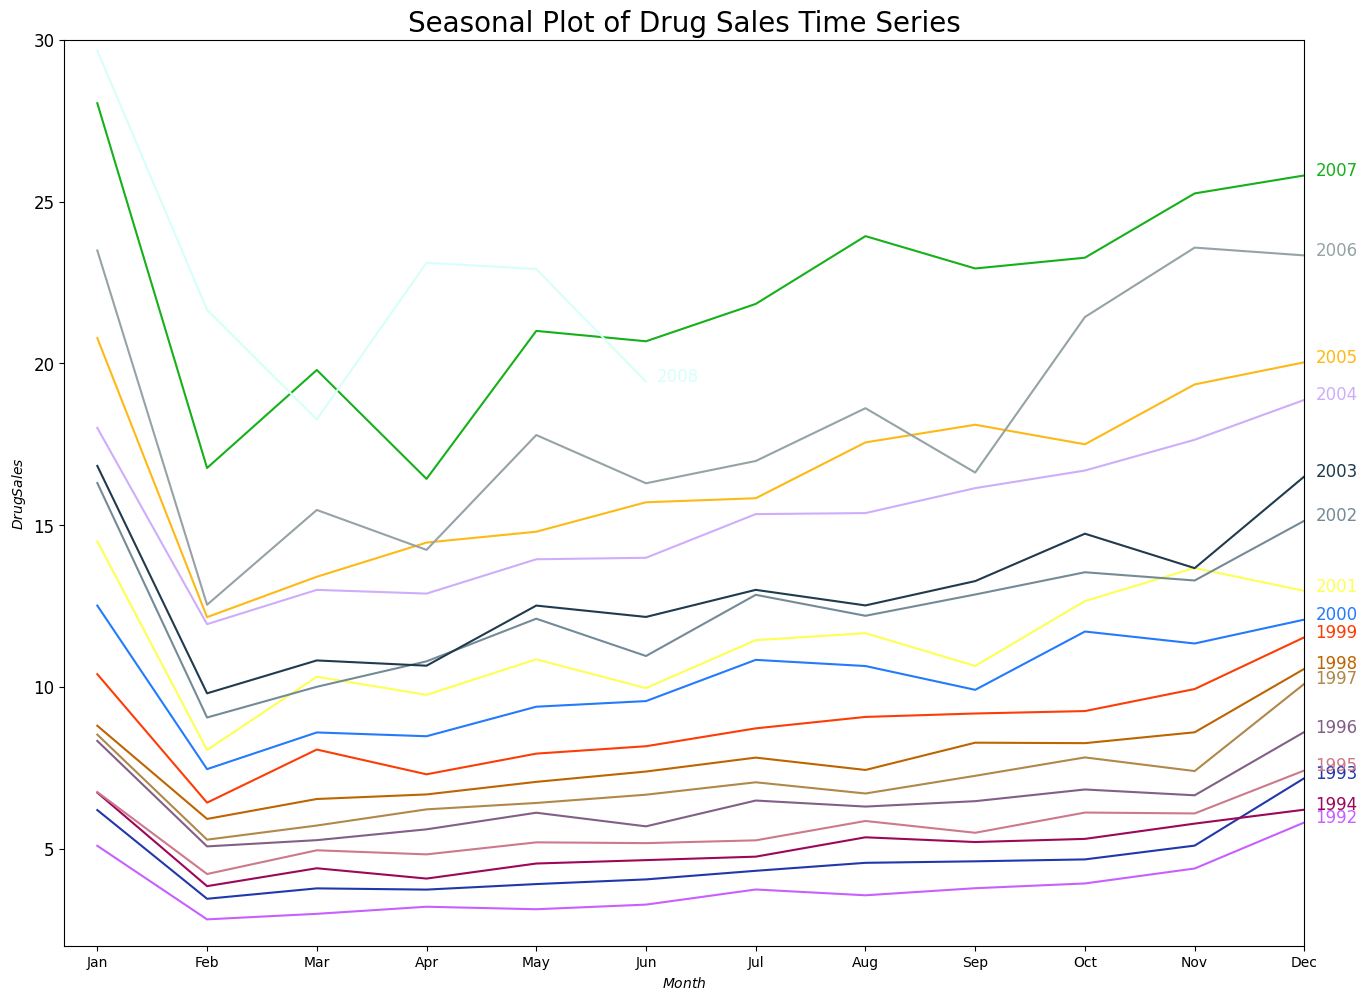

In [46]:
df_a10["year"] = [d.year for d in df_a10.date]
df_a10["month"] = [d.strftime("%b") for d in df_a10.date]
years = df_a10["year"].unique()

plt.figure(figsize = (16, 12), dpi = 100)
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)
for i, y in enumerate(years):
    if i > 0:
        plt.plot(
            "month", 
            "value", 
            data = df_a10.loc[df_a10.year == y, :], 
            color = mycolors[i], 
            label = y
        )
        plt.text(
            df_a10.loc[df_a10.year == y, :].shape[0] - 0.9, 
            df_a10.loc[df_a10.year == y, "value"][-1:].values[0], 
            y, 
            fontsize = 12, 
            color = mycolors[i]
        )

plt.gca().set(xlim = (-0.3, 11), ylim = (2, 30), xlabel = "$Month$", ylabel = "$Drug Sales$")
plt.yticks(fontsize = 12)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize = 20)

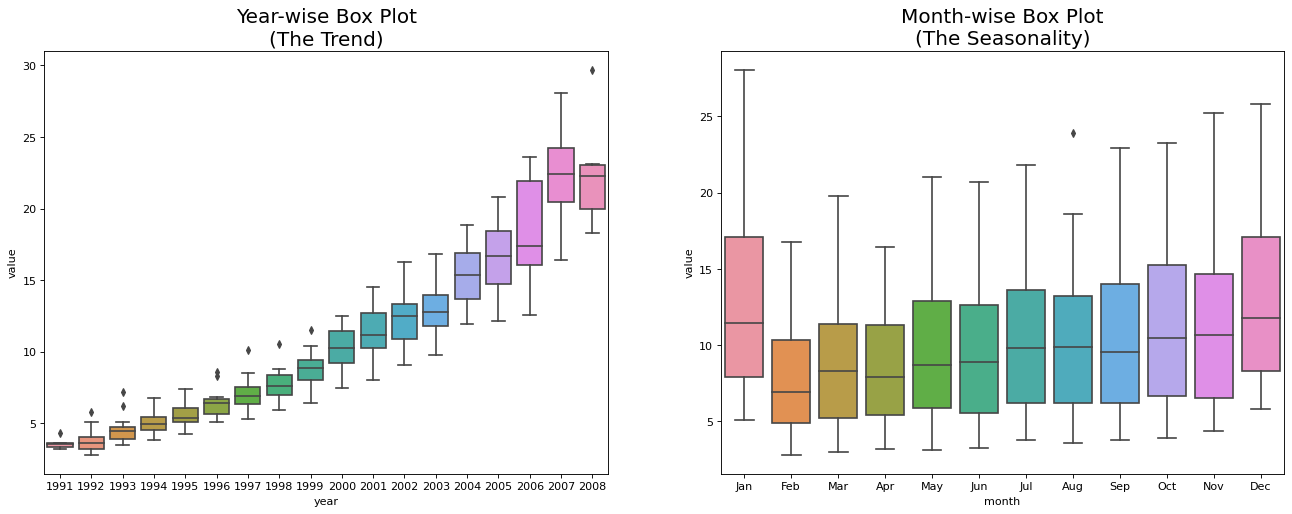

In [53]:
fig, axes = plt.subplots(1, 2, figsize = (20, 7), dpi = 80)
sns.boxplot(x = "year", y = "value", data = df_a10, ax = axes[0])
sns.boxplot(x = "month", y = "value", data = df_a10.loc[~df_a10.year.isin([1991, 2008]), :], ax = axes[1])
axes[0].set_title("Year-wise Box Plot\n(The Trend)", fontsize = 18)
axes[1].set_title("Month-wise Box Plot\n(The Seasonality)", fontsize = 18)
plt.show()